In [1]:
# Current Feedback

# Question is good, try to tell the story behind it by addressing which features are most important, what should the patient know, and how does the patient decrease probability of being sick

# Address imbalanced classifications by using Random Over/Under Sampling after the train test split

# Provide the probability that y=1 if imbalanced (Probability the tumor is bad/normal before model evaluation)

# Explain the differences between Recall and Precision in this testing scenario and provide a model that favors each

In [2]:
# To Do List

# Provide the Recall and Precision for each of the models below

# Select a model that favors Recall and report on it

# Select a model that favors Precision and report on it

# Running our selected "best" model against the test data to get overall results

# Create more "cool" graphs to show confusion matrices, charts for precision and recall, etc ...

# Adjust the presentation based on the updated code

In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [5]:
# Reading the data and adding column names
columns = [
    'ID', 'Diagnosis', 
    'mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 
    'mean_compactness', 'mean_concavity', 'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
    'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness', 
    'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry', 'se_fractal_dimension',
    'largest_radius', 'largest_texture', 'largest_perimeter', 'largest_area', 'largest_smoothness', 
    'largest_compactness', 'largest_concavity', 'largest_concave_points', 'largest_symmetry', 'largest_fractal_dimension'
]
df = pd.read_csv('wdbc.data', names = columns)

# Changing the Diagnosis to 0s and 1s for readability
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Checking to see if there is any missing data
print(f'There are {len(df[df.isna().any(axis=1)])} rows with missing data')

# Printing the top of the dataframe
df.head()

There are 0 rows with missing data


,ID,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,...,largest_radius,largest_texture,largest_perimeter,largest_area,largest_smoothness,largest_compactness,largest_concavity,largest_concave_points,largest_symmetry,largest_fractal_dimension
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


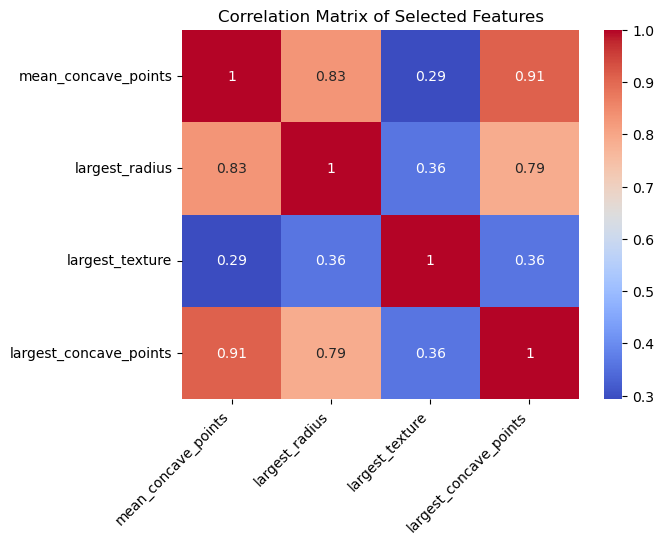

In [6]:
# Test for multicolinearity
selected_features = ['mean_concave_points', 'largest_radius', 'largest_texture', 'largest_concave_points']

corr_matrix = df[selected_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Matrix of Selected Features")
plt.show()

In [7]:
# Creating the X and y variables
X = df.drop(columns=['Diagnosis', 'ID'])
y = df['Diagnosis']

# Creating a train, validation, and test dataset
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


Resampled training set distribution:
 Diagnosis
0    287
1    287
Name: count, dtype: int64


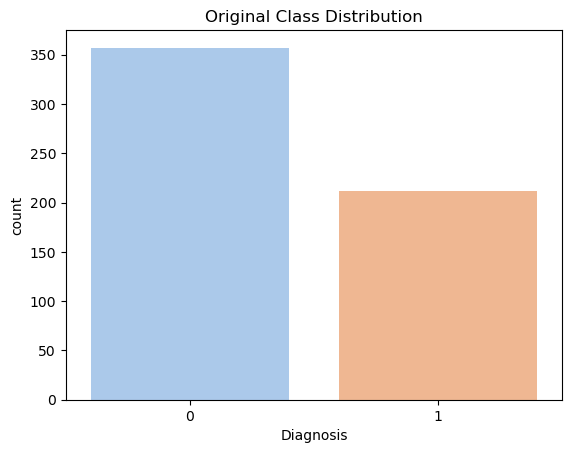

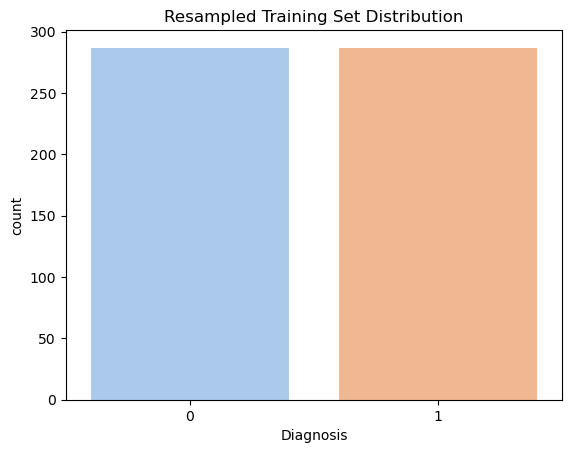

In [8]:
# Choose OverSampler or UnderSampler (OverSampler tends to work better for small datasets)
ros = RandomOverSampler(random_state=42)
# rus = RandomUnderSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled_scaled = scaler.fit_transform(X_resampled)

# Confirm the new balance
print("\nResampled training set distribution:\n", y_resampled.value_counts())

sns.countplot(x=y, hue=y, palette='pastel', legend=False)
plt.title('Original Class Distribution')
plt.show()

sns.countplot(x=y_resampled, hue=y_resampled, palette='pastel', legend=False)
plt.title('Resampled Training Set Distribution')
plt.show()

In [9]:
# Creating the logistic regression model with LASSO
lasso_model = LogisticRegression(random_state=42, penalty='l1', solver='saga', C=0.05, max_iter=10000) # C doesn't have to be used but reduces the amount of features selected
lasso_model.fit(X_resampled_scaled, y_resampled)

# Showing the coefficients
cfs = lasso_model.coef_[0]
sf = X.columns[cfs != 0]
print("Selected features:", sf)

# Predict probabilities for the positive class
y_pred_prob_l = lasso_model.predict_proba(X_val_scaled)[:, 1]
y_pred_l = lasso_model.predict(X_val_scaled)

# Calculate Accuracy
l_acc = accuracy_score(y_val, y_pred_l)
print(f"Accuracy (Validation) - Lasso: {l_acc:.4f}")

# Calculate AUC score
l_auc = roc_auc_score(y_val, y_pred_prob_l)
print(f"AUC score (validation) - Lasso: {l_auc:.4f}")

Selected features: Index(['mean_concave_points', 'se_radius', 'largest_radius', 'largest_texture',
       'largest_concave_points'],
      dtype='object')
Accuracy (Validation) - Lasso: 0.9649
AUC score (validation) - Lasso: 0.9986


In [10]:
# Creating the logistic regression model with RIDGE
ridge_model = LogisticRegression(random_state=42, penalty='l2', solver='saga', C=0.05, max_iter=10000)
ridge_model.fit(X_resampled_scaled, y_resampled)

# Predict probabilities for the positive class
y_pred_prob_r = ridge_model.predict_proba(X_val_scaled)[:, 1]
y_pred_r = ridge_model.predict(X_val_scaled)

# Calculate Accuracy
r_acc = accuracy_score(y_val, y_pred_r)
print(f"Accuracy (Validation) - Ridge: {r_acc:.4f}")

# Calculate AUC score
r_auc = roc_auc_score(y_val, y_pred_prob_r)
print(f"AUC score (validation) - Ridge: {r_auc:.4f}")

Accuracy (Validation) - Ridge: 0.9474
AUC score (validation) - Ridge: 1.0000


In [11]:
# Training Decision Tree Model using a Grid Search
tree_model = DecisionTreeClassifier(random_state=42)
md = {'max_depth': range(1, 16)}

# Doing Search with Cross Validation
grid_search = GridSearchCV(estimator=tree_model, param_grid=md, cv=5, scoring='accuracy')

# Fit the model and best parameters
grid_search.fit(X_resampled_scaled, y_resampled)
best_md = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_
print(f"Best max_depth: {best_md}")

# Make Predictions
y_pred_t = best_model.predict(X_val_scaled)
y_pred_prob_t = best_model.predict_proba(X_val_scaled)[:, 1]

# Evaluate
t_accuracy = accuracy_score(y_val, y_pred_t)
t_auc = roc_auc_score(y_val, y_pred_prob_t)

print(f"Accuracy (Validation) - Best Decision Tree: {t_accuracy:.4f}")
print(f"AUC score (Validation) - Best Decision Tree: {t_auc:.4f}")

Best max_depth: 6
Accuracy (Validation) - Best Decision Tree: 0.8947
AUC score (Validation) - Best Decision Tree: 0.9231


In [12]:
# Training K-NN using a grid search
knn_model = KNeighborsClassifier()
nn = {'n_neighbors': range(2, 21)}

# Doing Grid Search with Cross Validation
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=nn, cv=5, scoring='accuracy')

# Fit the model and get best parameters
grid_search_knn.fit(X_resampled_scaled, y_resampled)
best_nn = grid_search_knn.best_params_['n_neighbors']
best_knn_model = grid_search_knn.best_estimator_
print(f"Best number of neighbors found: {best_nn}")

# Predict with the best model
y_pred_knn = best_knn_model.predict(X_val_scaled)
y_pred_prob_knn = best_knn_model.predict_proba(X_val_scaled)[:, 1]

# Evaluate
knn_acc = accuracy_score(y_val, y_pred_knn)
knn_auc = roc_auc_score(y_val, y_pred_prob_knn)

print(f"Accuracy (Validation) - Best kNN: {knn_acc:.4f}")
print(f"AUC score (Validation) - Best kNN: {knn_auc:.4f}")

Best number of neighbors found: 3
Accuracy (Validation) - Best kNN: 0.9123
AUC score (Validation) - Best kNN: 0.9615


In [13]:
# Creating the forest model using grid search
rf_model = RandomForestClassifier(random_state=42)
ne = {'n_estimators': [50, 100, 150, 200, 250, 300]}

# Doing Grid Search with Cross Validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=ne, cv=5, scoring='accuracy')

# Fit the model and get best parameters
grid_search_rf.fit(X_resampled_scaled, y_resampled)
best_ne = grid_search_rf.best_params_['n_estimators']
best_rf_model = grid_search_rf.best_estimator_
print(f"Best number of estimators found: {best_ne}")

# Predict
y_pred_rf = best_rf_model.predict(X_val_scaled)
y_pred_prob_rf = best_rf_model.predict_proba(X_val_scaled)[:, 1]

# Evaluate
rf_acc = accuracy_score(y_val, y_pred_rf)
rf_auc = roc_auc_score(y_val, y_pred_prob_rf)

print(f"Accuracy (Validation) - Best Random Forest: {rf_acc:.4f}")
print(f"AUC score (Validation) - Best Random Forest: {rf_auc:.4f}")

Best number of estimators found: 50
Accuracy (Validation) - Best Random Forest: 0.9298
AUC score (Validation) - Best Random Forest: 1.0000


In [14]:
# Creating the SVM model
svm_model = SVC(random_state=42, probability=True)
grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Doing Grid Search with Cross Validation
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=grid_svm, cv=5, scoring='accuracy')

# Fitting the model and getting parameters
grid_search_svm.fit(X_resampled_scaled, y_resampled)
best_svm_params = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_
print(f"Best SVM Parameters found: {best_svm_params}")

# Predicting
y_pred_svm = best_svm_model.predict(X_val_scaled)
y_pred_prob_svm = best_svm_model.predict_proba(X_val_scaled)[:, 1]

# Evaluating
svm_acc = accuracy_score(y_val, y_pred_svm)
svm_auc = roc_auc_score(y_val, y_pred_prob_svm)

print(f"Accuracy (Validation) - Best SVM: {svm_acc:.4f}")
print(f"AUC score (Validation) - Best SVM: {svm_auc:.4f}")

Best SVM Parameters found: {'C': 100, 'gamma': 'scale', 'kernel': 'poly'}
Accuracy (Validation) - Best SVM: 0.8772
AUC score (Validation) - Best SVM: 0.9872


In [15]:
# Create the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
# CHANGE THIS TO ONLY INCLUDE WHAT WAS FROM LECTURE
param_grid_gb = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10]#,
    #'subsample': [0.8, 0.9, 1.0],
    #'min_samples_split': [2, 5, 10]
}

# Perform Grid Search with Cross Validation
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy', verbose = 1) # Added verbose to show combinations

# Fit the model with grid search and get parameters
grid_search_gb.fit(X_resampled_scaled, y_resampled)
best_gb_params = grid_search_gb.best_params_
best_gb_model = grid_search_gb.best_estimator_
print(f"Best Gradient Boosting Parameters found: {best_gb_params}")

# Predicting
y_pred_gb = best_gb_model.predict(X_val_scaled)
y_pred_prob_gb = best_gb_model.predict_proba(X_val_scaled)[:, 1]

# Evaluating
gb_acc = accuracy_score(y_val, y_pred_gb)

gb_auc = roc_auc_score(y_val, y_pred_prob_gb)

print(f"Accuracy (Validation) - Best Gradient Boosting: {gb_acc:.4f}")
print(f"AUC score (Validation) - Best Gradient Boosting: {gb_auc:.4f}")

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Best Gradient Boosting Parameters found: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Accuracy (Validation) - Best Gradient Boosting: 0.9474
AUC score (Validation) - Best Gradient Boosting: 0.9986


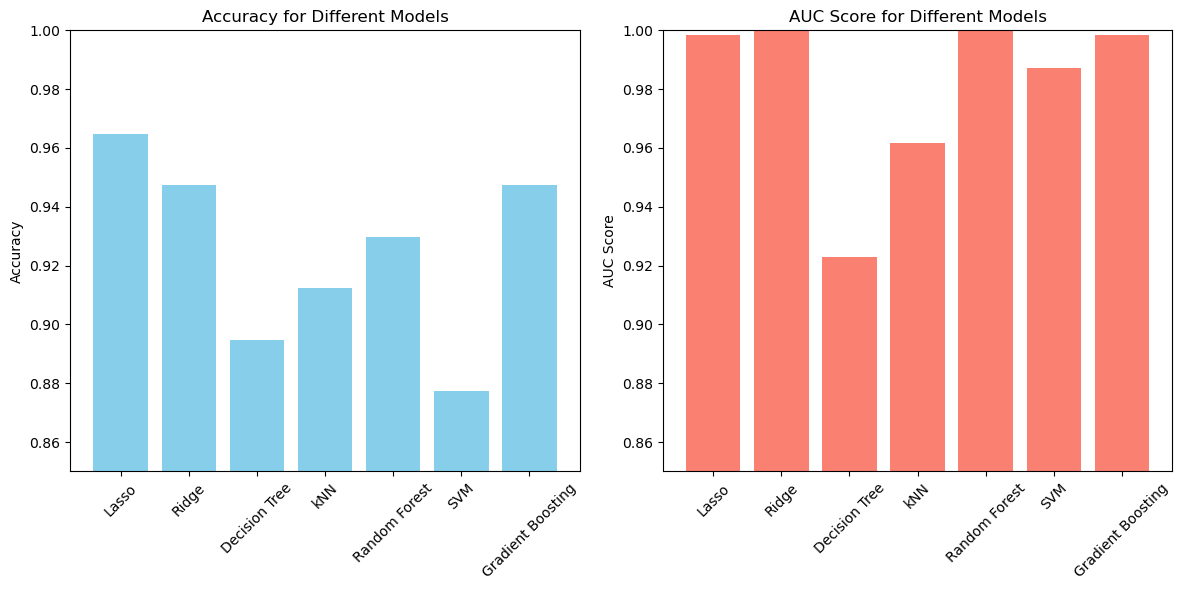

In [35]:
# Showing the Scores for all the models
models = ["Lasso", "Ridge", "Decision Tree", "kNN", "Random Forest", "SVM", "Gradient Boosting"]
all_acc = [l_acc, r_acc, t_accuracy, knn_acc, rf_acc, svm_acc, gb_acc]
all_auc = [l_auc, r_auc, t_auc, knn_auc, rf_auc, svm_auc, gb_auc]

# Creating the Plots
x = np.arange(len(models))
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)  
plt.bar(x, all_acc, color='skyblue')
plt.xticks(x, models, rotation=45)
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')
plt.ylim(0.85, 1)

# AUC
plt.subplot(1, 2, 2)
plt.bar(x, all_auc, color='salmon')
plt.xticks(x, models, rotation=45)
plt.ylabel('AUC Score')
plt.title('AUC Score for Different Models')
plt.ylim(0.85, 1)

plt.tight_layout()
plt.show()